#  Using a Brick Model for Data Retrieval

### Setup

Import packages and load the relevant ontology

In [4]:
# Packages
import matplotlib.pyplot as plt
import pandas as pd
import brickschema
import rdflib
from analysis import sparql_to_df, missing_values, timeseries_plot

# Specify the path to the Brick model. Load the model into a graph (already contains prefixs, so don't need to specify these).
model_path = "./ttl_files/example_compiled_bldg.ttl"
graph = brickschema.Graph().load_file(model_path)

### QUERY
Write your SPARQL query below:
- please refer to the id of the sensor as ?sensorid
- please refer to the unit of the sensor as ?unit

In [5]:
# This query looks for any power sensors related to a chiller
query = """
SELECT DISTINCT ?chiller ?sensor ?sensorid ?unit ?dblocation WHERE {
    ?chiller a brick:Chiller .
    ?chiller brick:hasPoint ?sensor .
    ?sensor a brick:Electrical_Power_Sensor ;
        brick:timeseries [ brick:hasTimeseriesId ?sensorid ; brick:storedAt ?db] ;
        brick:hasUnit ?unit .
    ?db brick:connString ?dblocation
} 
"""

# metadata and timeseries data 
metadata, timeseries = sparql_to_df(graph, query)

    Metadata

In [6]:
metadata.head()

,chiller,sensor,unit,dblocation
sensorid,,,,
CH0_PWR,Chiller_0,Chiller_0_Power_Sensor,KiloW,./csv_files/example_timeseries.csv
CH1_PWR,Chiller_1,Chiller_1_Power_Sensor,KiloW,./csv_files/example_timeseries.csv
CH2_PWR,Chiller_2,Chiller_2_Power_Sensor,KiloW,./csv_files/example_timeseries.csv
CH3_PWR,Chiller_3,Chiller_3_Power_Sensor,KiloW,./csv_files/example_timeseries.csv
CH4_PWR,Chiller_4,Chiller_4_Power_Sensor,KiloW,./csv_files/example_timeseries.csv


    Timeseries Data

In [7]:
timeseries.head()

,CH0_PWR,CH1_PWR,CH2_PWR,CH3_PWR,CH4_PWR,CH5_PWR,CH6_PWR,CH7_PWR
DATETIME,,,,,,,,
2022-10-10 08:00:00,634,699,647,644,679,NaN,NaN,NaN
2022-10-10 08:01:00,642,686,625,698,688,NaN,NaN,NaN
2022-10-10 08:02:00,680,630,680,693,637,NaN,NaN,NaN
2022-10-10 08:03:00,673,667,671,697,610,NaN,NaN,NaN
2022-10-10 08:04:00,669,666,677,655,701,NaN,NaN,NaN


At this point, the building data has been retrieved. Notice the query to retrieve the data did not require any knowledge of how the data was represented. 

### Visualize

Just as an example, we can graph the timeseries data

- use function timeseries_plot(timeseries, metadata, sensors, timeslice)
- inputs: timeseries and metadata as pandas dataframe, a list of sensors, timeslice as a tuple (YY-MM-DD HH-MM-SS, YY-MM-DD HH-MM-SS)


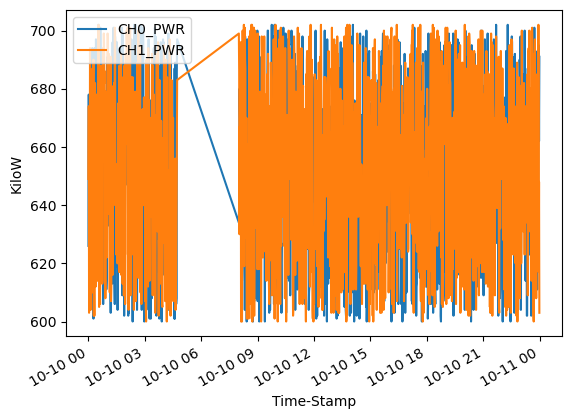

In [8]:
# timeslice = ('2021-05-11 08:04:00', '2021-05-11 9:00:00')
sensors = ['CH0_PWR', "CH1_PWR"]

timeseries_plot(timeseries, metadata, sensors)

### Data Validation

    Is the dataset empty?

In [9]:
missing_values(timeseries)

The timeseries data has 8 columns. 
3 of these have missing values.


,N. of Missing Values,% of Values Missing
CH5_PWR,1244,100.0
CH6_PWR,1244,100.0
CH7_PWR,1244,100.0


### Possible Queries

    Chiller On/Off Status

In [10]:
q = """
SELECT DISTINCT ?chiller ?status ?id WHERE {
    ?chiller a brick:Chiller .
    ?chiller brick:hasPoint ?status .
    ?status a brick:On_Off_Status ;
        brick:timeseries [ brick:hasTimeseriesId ?id ] .
} 
"""